In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix, classification_repor
from imblearn.metrics import classification_report_imbalanced

In [3]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/data/train_data.csv', header = None) 
df_test = pd.read_csv('/content/drive/MyDrive/data/test_data.csv', header = None) 
df_train_labels = pd.read_csv('/content/drive/MyDrive/data/train_labels.csv', header = None)

In [5]:
X = df_train
y = df_train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0, stratify = y, test_size = 0.3)

#Baseline

In [ ]:
def baseline_model(model):
  """
  Returns report for baseline model
  """
  model = model()
  base_dummy = model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report_imbalanced(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [ ]:
baseline_model(DummyClassifier)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.12      0.10      0.92      0.11      0.30      0.08       113
          1       0.90      0.92      0.10      0.91      0.30      0.10      1012

avg / total       0.82      0.84      0.18      0.83      0.30      0.10      1125

[[ 11 102]
 [ 77 935]]


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


#Model


DecisionTreeClassifier 0.9413333333333334
[[ 82  31]
 [ 25 987]]
KNeighborsClassifier 0.9573333333333334
[[ 85  28]
 [ 23 989]]
SVC 0.9573333333333334
[[ 98  15]
 [ 26 986]]


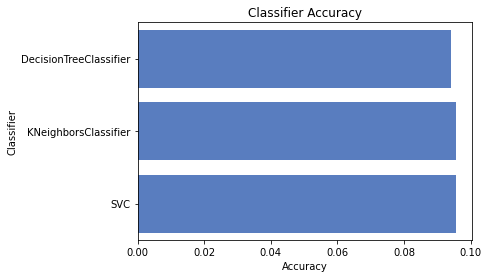

In [ ]:
dtc_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(3)
svm_clf = SVC()

classifiers = [dtc_clf, knn_clf, svm_clf]

def score(list):
  '''
  Return score, confusion matrix and plot results of the 3 models.
  Comparison of the 3 most famous classifiers.
  '''
  log_cols = ["Classifier", "Accuracy"]
  log 	 = pd.DataFrame(columns=log_cols)

  sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

  acc_dict = {}

  for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  for clf in list:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train.values.ravel())
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print(name, acc)

    if name in acc_dict:
      acc_dict[name] += acc
    else:
      acc_dict[name] = acc
  
  for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

  plt.xlabel('Accuracy')
  plt.title('Classifier Accuracy')

  sns.set_color_codes("muted")
  sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

score(classifiers)

##Boosting

In [ ]:
def adaboost():
    """
    Returns score and confusion matrix results of the AdaBoost
    """
    ab_clf = AdaBoostClassifier()
    name = ab_clf.__class__.__name__
    ab_clf.fit(X_train, y_train.values.ravel())
    train_predictions = ab_clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print(name, acc)
    print(confusion_matrix(y_test, train_predictions))

adaboost()

AdaBoostClassifier 0.9422222222222222
[[ 74  39]
 [ 26 986]]


In [32]:
def pipeline_adaboost(x_1: np.array, x_2: np.array, y_1: np.array, y_2: np.array):
    """
    Returns the best parameters, score and confusion matrix of the AdaBoost
    """
    classifier = AdaBoostClassifier()
    param = [{'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.01, 0.05]}]

    grid_search = GridSearchCV(classifier,
                              param,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                              scoring='f1')

    
    best_model = grid_search.fit(x_2, y_2.values.ravel())
    print(best_model.best_estimator_)
    y_pred = best_model.predict(x_2)
    print("The score of the model is:",f1_score(y_2, y_pred))
    print(confusion_matrix(y_2, y_pred))


pipeline_adaboost(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 28.8min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)
The score of the model is: 0.9930898321816387
[[ 105    8]
 [   6 1006]]


In [ ]:
def lgbboost():
    """
    Returns score and confusion matrix results of the LightGBM
    """
    lgb_clf = lgb.LGBMClassifier()
    name = lgb_clf.__class__.__name__
    lgb_clf.fit(X_train, y_train.values.ravel())
    train_predictions = lgb_clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print(name, acc)
    print(confusion_matrix(y_test, train_predictions))

lgbboost()

LGBMClassifier 0.9662222222222222
[[ 96  17]
 [ 21 991]]


In [61]:
 def pipeline_lgb(x_1: np.array, x_2: np.array, y_1: np.array, y_2: np.array):
    """
    Returns the best parameters, score and confusion matrix of the LightGBM
    """
    classifier = lgb.LGBMClassifier()
    param = [{
        'num_leaves': [7, 15, 31], 
        'max_depth': [3, 4, 5]
        }]

    grid_search = GridSearchCV(classifier,
                              param,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                              scoring='f1')

    
    best_model = grid_search.fit(x_2, y_2.values.ravel())
    print(best_model.best_estimator_)
    y_pred = best_model.predict(x_2)
    print("The score of the model is:",f1_score(y_2, y_pred))
    print(confusion_matrix(y_2, y_pred))
    print(classification_report_imbalanced(y_2, y_pred))

pipeline_lgb(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 20.8min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
The score of the model is: 1.0
[[ 113    0]
 [   0 1012]]
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      1.00      1.00      1.00      1.00      1.00       113
          1       1.00      1.00      1.00      1.00      1.00      1.00      1012

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      1125



#Final model

In [12]:
def final_model(X_1, X_2, y_1, y_2: np.array, save: bool = False):
    """
    Returns best model
    """
    pipe = Pipeline([('pca', PCA(n_components = 0.99)), 
                     ('scaler', StandardScaler()), 
                     ('classifier', SVC())])

    search_space = [{'scaler': [StandardScaler()],
                    'pca': [PCA(n_components = 0.99)]},
                    {'classifier': [SVC()],
                    'classifier__kernel': ['linear', 'poly'],
                    'classifier__class_weight': ['balanced'],
                    'classifier__C': np.logspace(1,4,5)},
                    {'classifier': [KNeighborsClassifier()],
                    'classifier__n_neighbors': [2, 4, 6, 8, 10],
                    'classifier__algorithm': ['auto']},
                    {'classifier': [AdaBoostClassifier()],
                    'classifier__n_estimators': [100],
                    'classifier__learning_rate': [0.1]}]

    grid_search = GridSearchCV(pipe,
                              search_space,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                              scoring='f1')
    
    best_model = grid_search.fit(X_1, y_1)
    y_predictions = best_model.predict(X_2)
    print('Best estimator: {}'.format(best_model.best_estimator_))
    print('Best score: {}'.format(best_model.best_score_))
    print('Best params: {}'.format(best_model.best_params_))
   

    return y_predictions

In [15]:
y_predictions = final_model(X_train, X_test, y_train, y_test, save=True)

Fitting 3 folds for each of 17 candidates, totalling 51 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed: 13.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best estimator: Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.99,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=5,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for

In [64]:
def clf_report(y_true, y_predicted: np.array) -> None:
    """
    Return score and confusion matrix
    """
    print(classification_report_imbalanced(y_true, y_predicted))
    print(confusion_matrix(y_test, y_predicted))

In [65]:
clf_report(y_test, y_predictions)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.81      0.88      0.98      0.84      0.93      0.86       113
          1       0.99      0.98      0.88      0.98      0.93      0.87      1012

avg / total       0.97      0.97      0.89      0.97      0.93      0.87      1125

[[100  13]
 [ 24 988]]


In [67]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()
tn, fp, fn, tp

(100, 13, 24, 988)

##Data

In [49]:
df = pd.DataFrame([y_predictions]).T
df.to_csv('labels.csv',index=False)